In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq, fftshift
from scipy.signal import find_peaks

In [21]:
data = pd.read_csv("_Все случаи по стране за день в динамике_2023-11-16_13-53-27.csv", sep=";", decimal=",")
data.head()

,Дата,Заражений за день,Выздоровлений за день,Смертей за день
0,2020-03-12 00:00:00,34,0,0
1,2020-03-13 00:00:00,11,0,0
2,2020-03-14 00:00:00,14,0,0
3,2020-03-15 00:00:00,4,3,0
4,2020-03-16 00:00:00,28,2,0


In [22]:
data_per_day = data.iloc[:, [0 , 1]]
data_per_day.head()

,Дата,Заражений за день
0,2020-03-12 00:00:00,34
1,2020-03-13 00:00:00,11
2,2020-03-14 00:00:00,14
3,2020-03-15 00:00:00,4
4,2020-03-16 00:00:00,28


Начальная дата 0


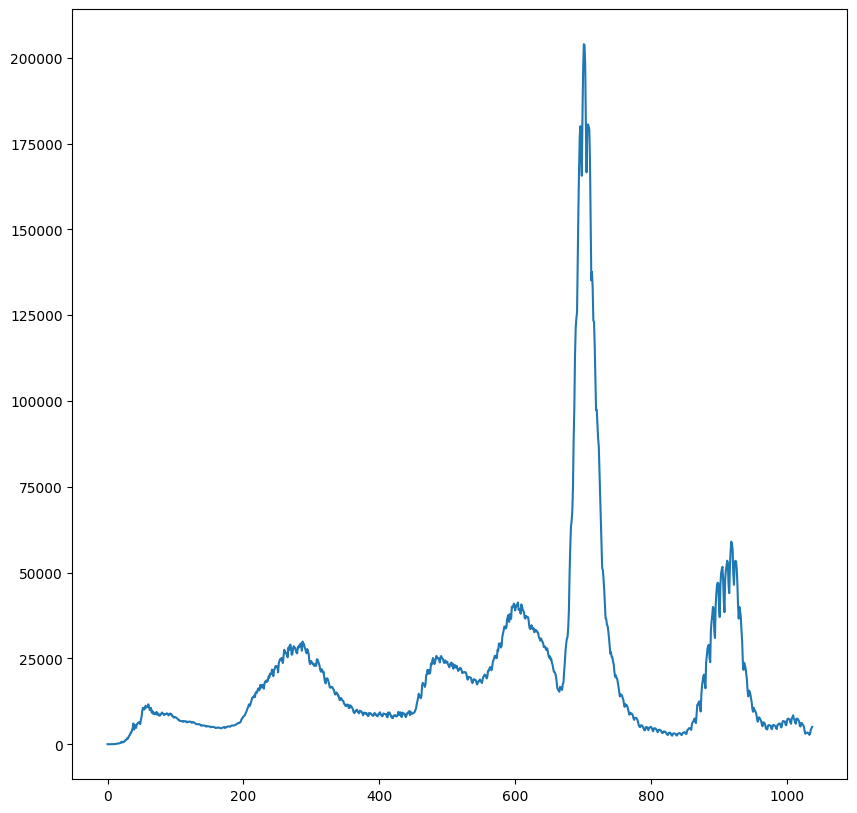

In [46]:
plt.figure(figsize = (10,10))
# Поменяем дату в формат "число дней между текущим и начальным"
print(f"Начальная дата {data_per_day['Дата'][0]}" )
data_per_day["Дата"] = np.arange(len(data_per_day["Дата"]))
plt.plot(data_per_day["Дата"], data_per_day["Заражений за день"])
plt.show()

In [24]:
data_ = data_per_day
f=abs(np.fft.fft(data_["Заражений за день"]))

# get the list of frequencies
num=np.size(data_["Дата"])
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

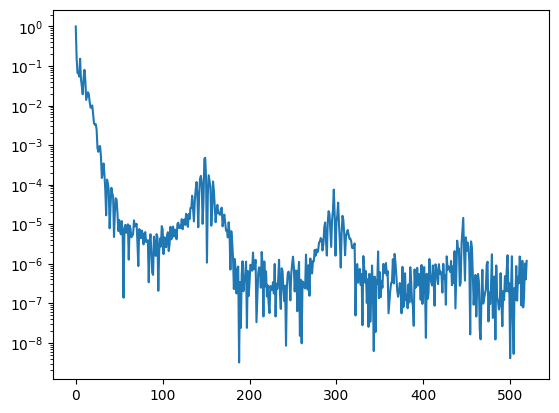

In [63]:
SAMPLE_RATE = 1 # Период дискретизации
N = len(data_["Заражений за день"])
yf = rfft(data_["Заражений за день"])
xf = N * rfftfreq(N, 1 / SAMPLE_RATE)
xf_t = np.array(xf) * np.size(data_["Дата"])

# переводим из частотной области в область по периодам
data_["period"] = len(data_["Дата"]) * np.array(freq) 
data_["frequency"] = freq
data_["nspectrum"] = nspectrum
data_['period_round'] = data_['period'].round()

grouped_week = data_.groupby('period_round')['nspectrum'].sum()
# Так как спектр зеркально отображен относительно центра, отрезаем половину
grouped_week = grouped_week[0:(len(data_["period"])/2)]
plt.semilogy(grouped_week.index, grouped_week)



# plt.semilogy(xf, np.abs(yf))
plt.show()

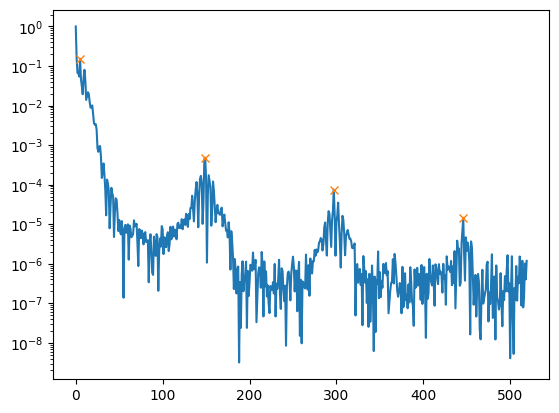

In [76]:
peaks, _ = find_peaks(grouped_week, distance=100)
plt.semilogy(grouped_week)
plt.semilogy(peaks, grouped_week[peaks], "x")
plt.semilogy(np.zeros_like(grouped_week), "--", color="gray")
plt.show()

In [79]:
for peak in peaks:
    print(f"На графике обнаружены колебания заболеваемости с периодом {peak} дней")

На графике обнаружены колебания заболеваемости с периодом 5 дней
На графике обнаружены колебания заболеваемости с периодом 149 дней
На графике обнаружены колебания заболеваемости с периодом 297 дней
На графике обнаружены колебания заболеваемости с периодом 446 дней


Самый маленький период колебаний заболеваемости оказался 5 дней. На мой взгляд, это может быть связано с тем, что рабочая неделя длится как раз 5 дней, и на выходных люди более активно передвигаются и посещают общественные места. С этим и связаны такие небольшие колебания заболеваемости.

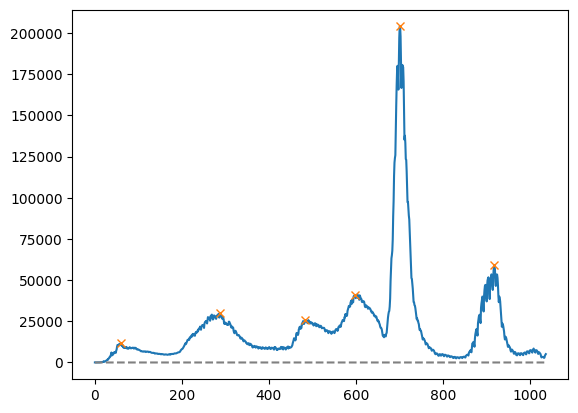

In [103]:
peaks_data, _ = find_peaks(data_per_day["Заражений за день"], distance=100)
peaks_data = np.delete(peaks_data, (1, 6, 8))
plt.plot(data_per_day["Заражений за день"])
plt.plot(peaks_data, data_per_day["Заражений за день"][peaks_data], "x")
plt.plot(np.zeros_like(data_per_day["Заражений за день"]), "--", color="gray")
plt.show()

In [105]:
for peak in peaks_data:
    print(f"Максимум заболеваемости на каждую волну был достигнут {data['Дата'][peak]}")

Максимум заболеваемости на каждую волну был достигнут 2020-05-11 00:00:00
Максимум заболеваемости на каждую волну был достигнут 2020-12-24 00:00:00
Максимум заболеваемости на каждую волну был достигнут 2021-07-09 00:00:00
Максимум заболеваемости на каждую волну был достигнут 2021-10-31 00:00:00
Максимум заболеваемости на каждую волну был достигнут 2022-02-11 00:00:00
Максимум заболеваемости на каждую волну был достигнут 2022-09-16 00:00:00
